In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def correlacion_pearson(data_frame, columna1, columna2):
    return np.corrcoef(data_frame[columna1], data_frame[columna2])[0,1];

# Experimentos
Leemos los dataframes con los resultados.

In [4]:

df_resultados_maximo_secuencial = pd.read_csv("../resultados/resultado_maximo_secuencial.csv");
df_resultados_maximo_concurrente = pd.read_csv("../resultados/resultado_maximo_concurrente.csv");
df_resultados_maximo = df_resultados_maximo_secuencial.append(df_resultados_maximo_concurrente, ignore_index = True);

df_resultados_cargarArchivo_secuencial = pd.read_csv("../resultados/resultado_cargarArchivo_secuencial.csv");
df_resultados_cargarArchivo_concurrente = pd.read_csv("../resultados/resultado_cargarArchivo_concurrente.csv");
df_resultados_cargarArchivo = df_resultados_cargarArchivo_secuencial.append(df_resultados_cargarArchivo_concurrente, ignore_index = True);




## Experimento 1: Complejidad de Fuerza Bruta
En este experimento evaluamos el método FB con los datasets muestra-aleatoria y sus variantes ordenadas. La hipótesis es que siempre va a tener un comportamiento exponencial porque tiene peor y mejor caso iguales.

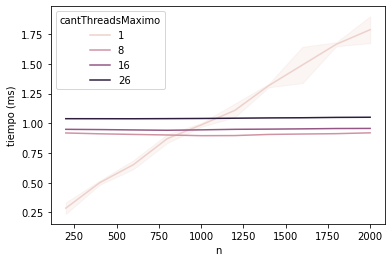

In [5]:
# Graficamos los tiempos de ejecución de cada dataset en función de n.
df_resultados_maximo["n"] = df_resultados_maximo.apply(lambda column: 200*column)
df_resultados_maximo = df_resultados_maximo[(df_resultados_maximo['cantThreadsMaximo'] == 1) | (df_resultados_maximo['cantThreadsMaximo'] == 8) | (df_resultados_maximo['cantThreadsMaximo'] == 16) | (df_resultados_maximo['cantThreadsMaximo'] == 26)]
fig = sns.lineplot(data=df_resultados_maximo, x='n', y='tiempo', hue='cantThreadsMaximo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
#plt.savefig("../graficos/tiempo-heuristicas.svg");

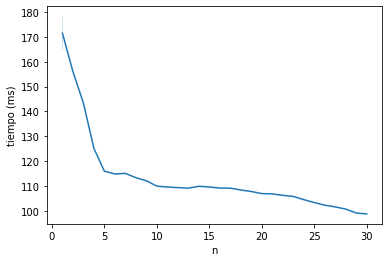

In [9]:
# Graficamos los gaps de ejecución de cada dataset en función de n.
fig = sns.lineplot(data=df_resultados_cargarArchivo, x='cantThreadsLectura', y='tiempo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
#plt.savefig("../graficos/calidad-heuristicas.svg");